## Horizontal barplots 

In [2]:
#Import the libraries
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
from matplotlib import cm
#ncol = len(phy_norm.T.columns)
ncol = 12
values = np.linspace(0,1, ncol)
colors_ = cm.Paired(values)
sns.set_style("darkgrid")

### Get the most recent versions of the following libreries 

1. Pandas      =  0.20 
2. Numpy       = 1.13
3. Seaborn     =  0.8.0
4. Plt matplot =  1.13.3 

## 1. Read dataframe


Profile abundances where samples are columns and taxa are rows

In [16]:
genus=pd.read_table("/home/val/Dropbox/paper_mats/2_Profiles_data/parsed_files/genusN0.txt", index_col=0)
genus.index.name=None
genus = genus.sort_values('S1', ascending=False) 
genus.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Bacteria unclassified,1438,479,1550,1925,1651,1652,1938,2156,2058,2401,2537,2551
Rhodobacteraceae unclassified,1315,713,2648,2241,1537,600,1044,1033,998,782,417,808
Proteobacteria unclassified,1089,343,1418,1661,1320,1276,1591,1547,1519,1471,1283,2289
Alphaproteobacteria unclassified,938,360,1263,1479,919,737,1009,831,951,883,546,996
Actinobacteria unclassified_class_1760,648,148,612,927,669,772,1026,906,949,891,881,1140


## 2. Normalize data 

In [15]:
genus_norm=genus/genus.sum()
genus_norm.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Bacteria unclassified,0.059515,0.034961,0.035846,0.047151,0.047101,0.079576,0.055871,0.056328,0.069912,0.089966,0.107092,0.078015
Rhodobacteraceae unclassified,0.054424,0.052040,0.061240,0.054891,0.043849,0.028902,0.030098,0.026988,0.033903,0.029302,0.017602,0.024710
Proteobacteria unclassified,0.045071,0.025035,0.032794,0.040685,0.037658,0.061464,0.045867,0.040417,0.051602,0.055118,0.054158,0.070002
Alphaproteobacteria unclassified,0.038821,0.026275,0.029209,0.036227,0.026218,0.035501,0.029089,0.021711,0.032306,0.033086,0.023048,0.030460
Actinobacteria unclassified_class_1760,0.026819,0.010802,0.014154,0.022706,0.019086,0.037187,0.029579,0.023670,0.032238,0.033386,0.037189,0.034863


## 3. Split dataframe (optional )


In case you want to split the dataframe in to several dataframes 

In [19]:
genus_norm_a=genus_norm[['S1', 'S4', 'S7', 'S10']]

## 4. Rename  columns dataframe (optional )

In [21]:
genus_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
genus_norm_a.head()

,Autumn 2012,Spring 2013,Autumn 2013,Spring 2014
Bacteria unclassified,0.059515,0.047151,0.055871,0.089966
Rhodobacteraceae unclassified,0.054424,0.054891,0.030098,0.029302
Proteobacteria unclassified,0.045071,0.040685,0.045867,0.055118
Alphaproteobacteria unclassified,0.038821,0.036227,0.029089,0.033086
Actinobacteria unclassified_class_1760,0.026819,0.022706,0.029579,0.033386


## 5. Plot dataframe

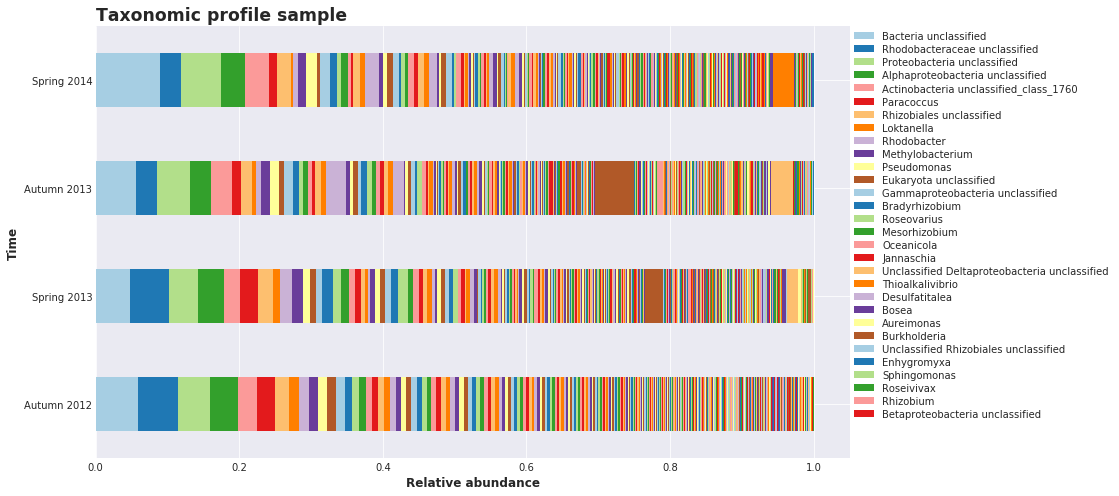

In [25]:
ax1=genus_norm_a.T.plot(kind='barh',stacked=True,color=colors_, figsize=(12,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:30], labels[:30], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.3)  
plt.title("Taxonomic profile sample", weight='bold', size='xx-large', loc='left')
plt.xlabel("Relative abundance", weight='bold', size="large" )
plt.ylabel("Time", weight="bold",size="large")
plt.tight_layout()
plt.savefig("MyPlot.png", bbox_inches='tight', dpi=400)
